In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go 
import plotly.express as px

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')



# K-Nearest Neighbors (KNN) Classification  
## Decision Boundary Visualization using Iris Dataset

### Objective
In this assignment, you will:
- Load and explore a real dataset (Iris)
- Implement KNN using scikit-learn
- Observe predictions for different values of **k**
- Visualize decision boundaries
- Analyze the effect of distance metrics

**Important Instructions**
- Do NOT use GridSearchCV or RandomizedSearchCV
- Change values of `k` manually
- Use only two features and two classes



## Task 1: Load and Explore the Dataset
We will use the Iris dataset from `sklearn`.  
Only:
- Features: Sepal Length, Sepal Width  
- Classes: Setosa (0) and Versicolor (1)


In [2]:

from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()

X = iris.data[:, :2]   # sepal length, sepal width
y = iris.target

# Keep only class 0 and 1
mask = y < 2
X = X[mask]
y = y[mask]

print("Shape of X:", X.shape)
print("Class distribution:", np.bincount(y))

df = pd.DataFrame(X, columns=["Sepal Length", "Sepal Width"])
df["Class"] = y
df.head()


Shape of X: (100, 2)
Class distribution: [50 50]


Sepal Length  Sepal Width  Class
0           5.1          3.5      0
1           4.9          3.0      0
2           4.7          3.2      0
3           4.6          3.1      0
4           5.0          3.6      0


## Task 2: Visualize the Dataset


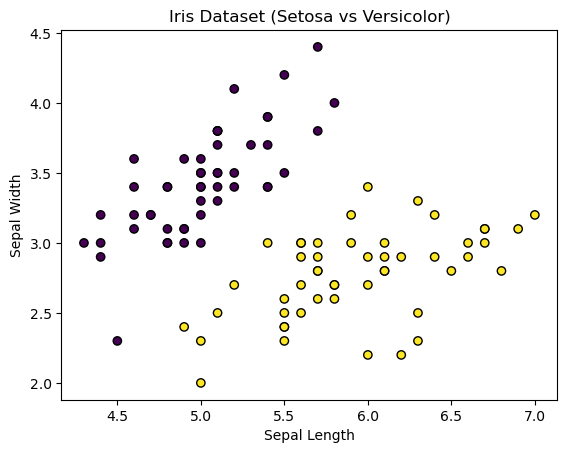

In [3]:

import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Iris Dataset (Setosa vs Versicolor)")
plt.show();


## Task 3: Train a Basic KNN Model (k = 3)


1) split the data into Train data and Test data
2) Fit a KNeighborsClassifier
3) Make the prediction
4) Check for the accuracy

In [4]:
X = iris.data[:, :2]
y = iris.target

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((120, 2), (30, 2), (120,), (30,))

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn

KNeighborsClassifier(n_neighbors=3)

In [7]:
from sklearn.metrics import accuracy_score
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
y_predicted=knn.predict(x_test)
y_predicted
accuracy_score(y_test,y_predicted)

KNeighborsClassifier(n_neighbors=3)

0.875

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2, 0, 0, 0, 0, 2, 2, 1, 1, 1, 0, 1,
       0, 1, 2, 2, 1, 2, 0, 0])

0.8


## Task 4: Predictions for Different Values of k


In [8]:
# for n_neighbors=1

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
y_predicted=knn.predict(x_test)
y_predicted
accuracy_score(y_test,y_predicted)

KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=1)

0.9333333333333333

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 2, 0, 0, 0, 0, 2, 2, 1, 1, 1, 0, 1,
       0, 1, 2, 1, 1, 2, 0, 0])

0.7333333333333333

In [9]:
# for n_neighbors=2

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
y_predicted=knn.predict(x_test)
y_predicted
accuracy_score(y_test,y_predicted)

KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier(n_neighbors=2)

0.8583333333333333

array([1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 1, 1, 1, 0, 1,
       0, 1, 2, 1, 1, 2, 0, 0])

0.7333333333333333

In [10]:
# for n_neighbors=4

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
y_predicted=knn.predict(x_test)
y_predicted
accuracy_score(y_test,y_predicted)

KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier(n_neighbors=4)

0.8416666666666667

array([1, 0, 2, 1, 1, 0, 1, 1, 1, 2, 2, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 1,
       0, 1, 2, 1, 1, 2, 0, 0])

0.7

In [11]:
# for n_neighbors=5

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
y_predicted=knn.predict(x_test)
y_predicted
accuracy_score(y_test,y_predicted)

KNeighborsClassifier()

KNeighborsClassifier()

0.8416666666666667

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 2, 0, 1,
       0, 2, 2, 1, 1, 2, 0, 0])

0.8

In [12]:
# for n_neighbors=6

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=6)
knn
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
y_predicted=knn.predict(x_test)
y_predicted
accuracy_score(y_test,y_predicted)

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=6)

0.825

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 1,
       0, 2, 2, 1, 1, 2, 0, 0])

0.8333333333333334

In [13]:
# for n_neighbors=7

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
y_predicted=knn.predict(x_test)
y_predicted
accuracy_score(y_test,y_predicted)

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=7)

0.8

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1,
       0, 2, 2, 1, 1, 2, 0, 0])

0.7666666666666667

In [14]:
# for n_neighbors=8

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8)
knn
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
y_predicted=knn.predict(x_test)
y_predicted
accuracy_score(y_test,y_predicted)

KNeighborsClassifier(n_neighbors=8)

KNeighborsClassifier(n_neighbors=8)

0.825

array([1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 1,
       0, 2, 2, 1, 1, 2, 0, 0])

0.8

In [15]:
# for n_neighbors=9

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
y_predicted=knn.predict(x_test)
y_predicted
accuracy_score(y_test,y_predicted)

KNeighborsClassifier(n_neighbors=9)

KNeighborsClassifier(n_neighbors=9)

0.8083333333333333

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 1,
       0, 2, 2, 1, 1, 2, 0, 0])

0.8

In [16]:
# for n_neighbors=10

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
knn
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
y_predicted=knn.predict(x_test)
y_predicted
accuracy_score(y_test,y_predicted)

KNeighborsClassifier(n_neighbors=10)

KNeighborsClassifier(n_neighbors=10)

0.8

array([1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 1,
       0, 2, 2, 1, 1, 2, 0, 0])

0.8

In [17]:
# for n_neighbors=11

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=11)
knn
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
y_predicted=knn.predict(x_test)
y_predicted
accuracy_score(y_test,y_predicted)

KNeighborsClassifier(n_neighbors=11)

KNeighborsClassifier(n_neighbors=11)

0.8

array([2, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 1,
       0, 2, 2, 1, 1, 2, 0, 0])

0.7666666666666667

In [18]:
# for n_neighbors=50

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=50)
knn
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
y_predicted=knn.predict(x_test)
y_predicted
accuracy_score(y_test,y_predicted)

KNeighborsClassifier(n_neighbors=50)

KNeighborsClassifier(n_neighbors=50)

0.7666666666666667

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0])

0.9333333333333333


## Task 5: Decision Boundary Function (Provided)


In [19]:

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.02),
        np.arange(y_min, y_max, 0.02)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.title(title)
    plt.show()



## Task 6: Decision Boundary for Different Values of k


KNeighborsClassifier(n_neighbors=1)

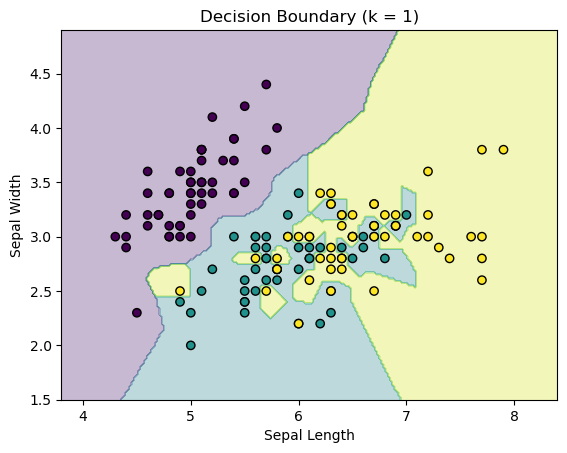

KNeighborsClassifier(n_neighbors=3)

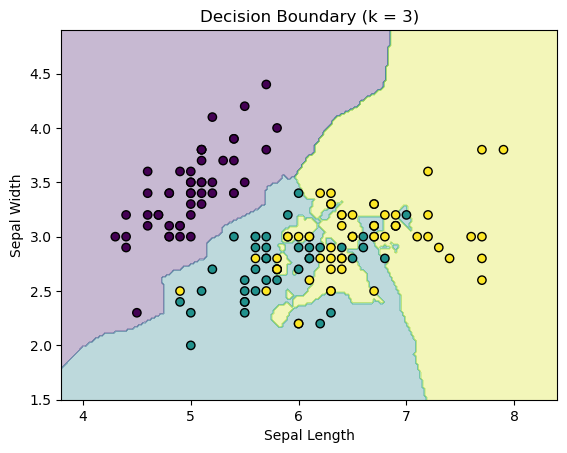

KNeighborsClassifier()

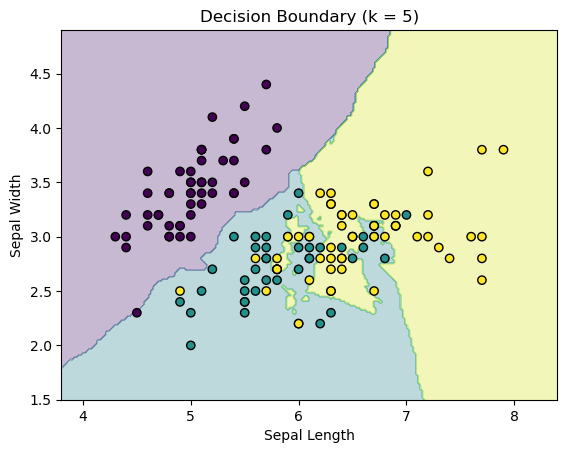

KNeighborsClassifier(n_neighbors=11)

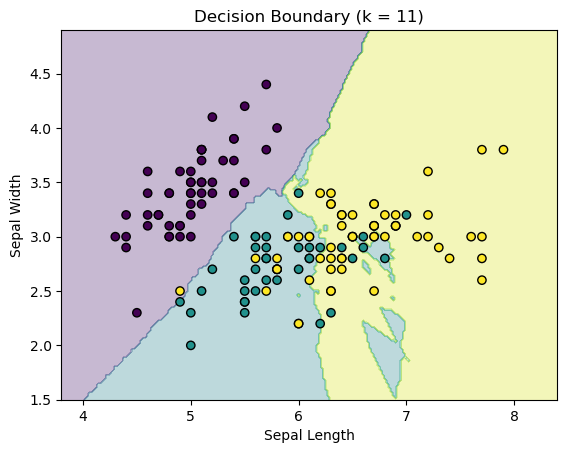

KNeighborsClassifier(n_neighbors=50)

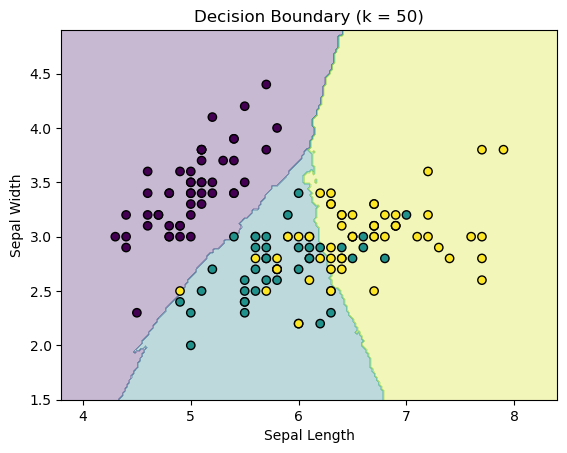

In [20]:
for k in [1, 3, 5, 11,50]:
    model = KNeighborsClassifier(n_neighbors=k, p=2)
    model.fit(X, y)
    plot_decision_boundary(model, X, y, title=f"Decision Boundary (k = {k})")

### Task 7: Effect of Distance Metric
### Fix k = 5 and compare Euclidean vs Manhattan distance


#### Plot a decision boundary when using k=5 and change the distance

In [21]:
knn_euclidean = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn_euclidean

KNeighborsClassifier(metric='euclidean')

KNeighborsClassifier()

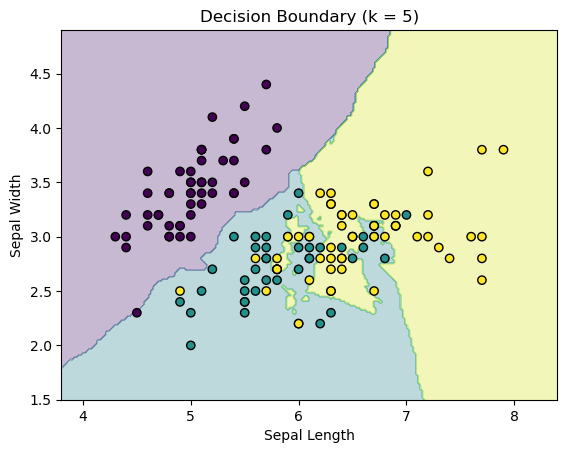

In [22]:
model = KNeighborsClassifier(n_neighbors=5, p=2)
model.fit(X, y)
plot_decision_boundary(model, X, y, title=f"Decision Boundary (k = {5})")

In [23]:
knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=1)
knn

KNeighborsClassifier(p=1)

KNeighborsClassifier(p=1)

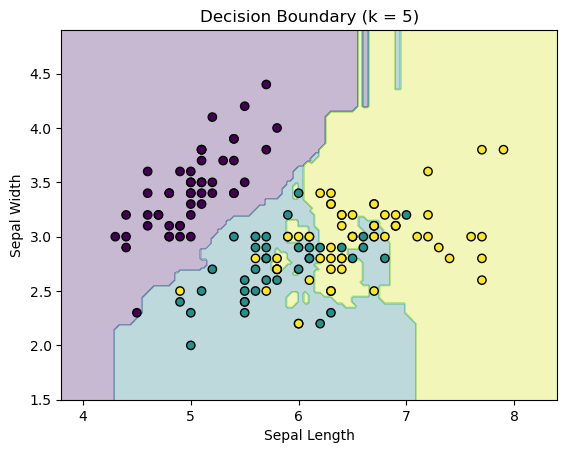

In [24]:
model = KNeighborsClassifier(n_neighbors=5, p=1)
model.fit(X, y)
plot_decision_boundary(model, X, y, title=f"Decision Boundary (k = {5})")


## Task 8: Observations (Answer in Markdown)
1. How do predictions change as k increases?
2. Which k value gives the most complex decision boundary?
3. Why does k = 1 behave differently?
4. How does distance metric affect results?
5. Which configuration would you choose and why?


#### 1. How do predictions change as k increases?

In KNN, prediction = majority vote of k nearest neighbors.

>As k is small

Prediction depends on very few points

Highly sensitive to noise

Small changes in data → big changes in prediction

>As k increases

More neighbors are considered

Noise gets averaged out

Predictions become more stable and smoother

Model becomes less sensitive to individual points

>Summary

Small k → local, noisy, flexible

Large k → global, smooth, stable

#### 2. Which k value gives the most complex decision boundary?

>k = 1

Why?

Each training point defines its own region

Decision boundary bends around every point

Even a single noisy point creates its own island

This produces:

Extremely irregular

Highly complex

Very wiggly boundaries


#### 3. Why does k = 1 behave differently?

**when k = 1**

>Because with k = 1:

The class of the nearest single point decides everything.

Consequences

No averaging

No smoothing

Every point becomes its own “rule”

ML interpretation

Zero bias

Very high variance

Perfect training accuracy

Poor generalization

This is the classic overfitting case.

#### 4. How does distance metric affect results?

Distance metric decides who is considered “nearest”.

Common metrics and their effects
- Euclidean

Assumes features are on comparable scales

Sensitive to magnitude

Good for continuous numeric data

Requires feature scaling

- Manhattan

Less sensitive to outliers

Works better in grid-like data

Often more robust than Euclidean

- Cosine

Uses angle, not magnitude

Best for high-dimensional sparse data (text, embeddings)

Two points can be “close” even if far in Euclidean sense

- Minkowski

Generalized form (p controls behavior)

p=1 → Manhattan

p=2 → Euclidean

Key insight

Changing the distance metric changes neighbor ordering,
which directly changes predictions.

#### 5. Which configuration would you choose and why?



Moderate k (e.g., 5–15)

Distance metric based on data type

Feature scaling applied

>Moderate k balances:

Bias (not too large)

Variance (not too small)

Avoids overfitting (k=1)

Avoids underfitting (very large k)

>Typical choices

Numeric features → Euclidean + scaling

Text / embeddings → Cosine

Binary / categorical → Hamming / Jaccard

Final k → chosen using cross-validation

- Predictions become smoother and more stable as k increases

- k = 1 gives the most complex decision boundary

- k = 1 overfits because it relies on a single nearest point

- Distance metric changes neighbor selection, hence predictions

- Choose moderate k with a metric suited to the data and validate